In [34]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [35]:
# readl file:
filepath = "datasets/DC_Properties.csv"
df = pd.read_csv(filepath)
df.head()

C:\Users\thuyq\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [36]:
# check data dimension:
df.shape

(158957, 49)

In [37]:
# check if any missing values in data:
df.count()

Unnamed: 0            158957
BATHRM                158957
HF_BATHRM             158957
HEAT                  158957
AC                    158957
NUM_UNITS             106696
ROOMS                 158957
BEDRM                 158957
AYB                   158686
YR_RMDL                80928
EYB                   158957
STORIES               106652
SALEDATE              132187
PRICE                  98216
QUALIFIED             158957
SALE_NUM              158957
GBA                   106696
BLDG_NUM              158957
STYLE                 106696
STRUCT                106696
GRADE                 106696
CNDTN                 106696
EXTWALL               106696
ROOF                  106696
INTWALL               106696
KITCHENS              106695
FIREPLACES            158957
USECODE               158957
LANDAREA              158957
GIS_LAST_MOD_DTTM     158957
SOURCE                158957
CMPLX_NUM              52261
LIVING_GBA             52261
FULLADDRESS           106040
CITY          

In [38]:
# find Price value of qualified houses: 
price_df = df.loc[df['QUALIFIED']=="Q"][['PRICE']]
price_df.count()

PRICE    76233
dtype: int64

In [39]:
# check if any missing value in price_df:
price_df.isnull().sum()

PRICE    116
dtype: int64

In [40]:
# replace missing value by mean value of price_df:
mean = price_df.mean()
price_df_modified = price_df.fillna(mean)
price_df_modified.count()

PRICE    76349
dtype: int64

In [41]:
# verify if any missing value in price_df:
price_df_modified.isnull().sum()

PRICE    0
dtype: int64

## Z-score standardization

In [42]:
# use scikit-learn to calculate z-scores:
scaler = StandardScaler()
price_zscore = scaler.fit_transform(price_df_modified)

In [43]:
# calculate mean and standard deviation of z score standardized price column:
price_zscore.mean(),price_zscore.std()

(2.1032712711598402e-17, 0.9999999999999998)

In [44]:
# change data back to series type:
price_zscore = pd.Series(price_zscore.reshape(-1))

In [45]:
# first 5 rows of z score standardized price column:
price_zscore.head()

0    1.103461
1    3.120976
2    2.121252
3    2.819854
4    1.013125
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002302DB89508>]],
      dtype=object)

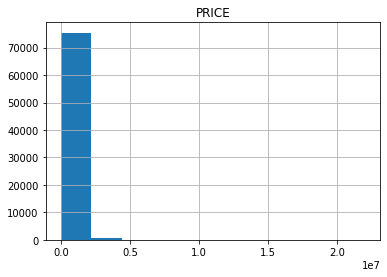

In [47]:
# frequency count plot of price columns without z score standardization:
price_df_modified.hist()

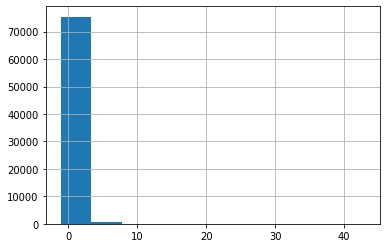

In [48]:
price_zscore.hist()

## Min-max scaling

In [53]:
# use MinMaxScaler function and fit transform function on price column:
minmax_sc = MinMaxScaler()
price_minmax = minmax_sc.fit_transform(price_df_modified)


In [54]:
# mean and standard deviation of Min max price column:
price_minmax.mean(), price_minmax.std()

(0.024776397908556333, 0.022642874820901125)

In [55]:
# covert array into a dataframe column
price_mm = pd.Series(price_minmax.reshape(-1))

In [56]:
price_mm.head()

0    0.049762
1    0.095444
2    0.072808
3    0.088626
4    0.047716
dtype: float64

In [57]:
# verify the range is between 0 and 1:
price_mm.min(), price_mm.max()

(0.0, 1.0000000000000002)

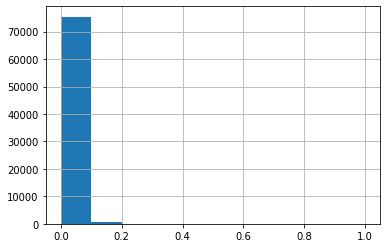

In [58]:
price_mm.hist()